## Data: oil & gas industry
https://aegis4048.github.io/mutiple_linear_regression_and_visualization_in_python

<div><hr/></div><p><strong>데이터 설명</strong></p>
<ol>
<li><em>Well</em> : well index</li>
<li><em>Por</em> : well average porosity (%) </li>
<li><em>Perm</em> : permeability (mD)</li>
<li><em>AI</em> : acoustic impedance (kg/m2s*10^6)</li>
<li><em>Brittle</em> : brittleness ratio (%) </li>
<li><em>TOC</em> : total organic carbon (%) </li>
<li><em>VR</em> : vitrinite reflectance (%)</li>
<li><em>Prod</em> : gas production per day (MCFD) - <strong>Target 값</strong></li>
</ol>
<div class="col"><img src="https://aegis4048.github.io/jupyter_images/multiple_linear_permutation_feature_importance.png" width="500"/></div>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model

In [13]:
######################################## Data preparation #########################################

file = 'https://aegis4048.github.io/downloads/notebooks/sample_data/unconv_MV_v5.csv'
df = pd.read_csv(file)
X = df['Por'].values.reshape(-1,1)
y = df['Prod'].values
df.head(10)

,Well,Por,Perm,AI,Brittle,TOC,VR,Prod
0,1,12.08,2.92,2.80,81.40,1.16,2.31,4165.196191
1,2,12.38,3.53,3.22,46.17,0.89,1.88,3561.146205
2,3,14.02,2.59,4.01,72.80,0.89,2.72,4284.348574
3,4,17.67,6.75,2.63,39.81,1.08,1.88,5098.680869
4,5,17.52,4.57,3.18,10.94,1.51,1.90,3406.132832
5,6,14.53,4.81,2.69,53.60,0.94,1.67,4395.763259
6,7,13.49,3.60,2.93,63.71,0.80,1.85,4104.400989
7,8,11.58,3.03,3.25,53.00,0.69,1.93,3496.742701
8,9,12.52,2.72,2.43,65.77,0.95,1.98,4025.851153
9,10,13.25,3.94,3.71,66.20,1.14,2.65,4285.026122


In [14]:
!pwd

/content


### **numpy.ndarray.reshape()**
: ndarray의 method

함수 numpy.reshape(): 같은 기능을 수행

-1의 의미: 개수를 모르겠으니 알아서 정해달라는 의미

8개의 원소를 갖는 1차원 ndarray를 reshape해보자

* reshape(2, -1) -> (2,4) shape을 갖는 2차원 ndarray로 변환
* reshape(-1, 2) -> (4,2) shape을 갖는 2차원 ndarray로 변환

In [15]:
################################################ Train #############################################

ols = linear_model.LinearRegression()
model = ols.fit(X, y)
response = model.predict(X)

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

**LinearRegression**: Scikit-learn의 subpackage linear_model에 있는 클래스

**fit(), predict(), score()**: LinearRegression의 method들

In [16]:
############################################## Evaluate ############################################

r2 = model.score(X, y)

Text(0.5, 1.0, '$R^2= 0.74$')

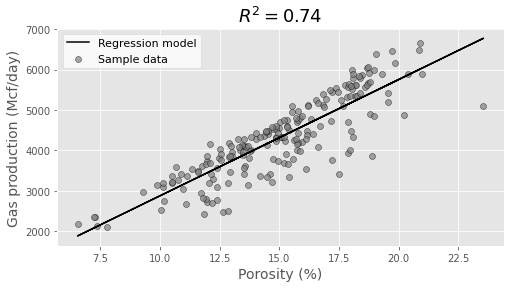

In [17]:
############################################## Plot ################################################

plt.style.use('ggplot')

fig, ax = plt.subplots(figsize=(8, 4))

ax.plot(X, response, color='k', label='Regression model')
ax.scatter(X, y, edgecolor='k', facecolor='grey', alpha=0.7, label='Sample data')
ax.set_ylabel('Gas production (Mcf/day)', fontsize=14)
ax.set_xlabel('Porosity (%)', fontsize=14)
ax.legend(facecolor='white', fontsize=11)
ax.set_title('$R^2= %.2f$' % r2, fontsize=18)

**pyplot.subplots()**: pyplot에 있는 함수

https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html


In [18]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

In [19]:
######################################## Data preparation #########################################

X = df[['Por', 'Brittle']].values.reshape(-1,2)
Y = df['Prod']
df[['Por', 'Brittle']].values.reshape(-1,2).shape

(200, 2)

In [20]:
######################## Prepare model data point for visualization ###############################

x = X[:, 0]
y = X[:, 1]
z = Y

x_pred = np.linspace(6, 24, 30)   # range of porosity values
y_pred = np.linspace(0, 100, 30)  # range of brittleness values
xx_pred, yy_pred = np.meshgrid(x_pred, y_pred)
model_viz = np.array([xx_pred.flatten(), yy_pred.flatten()]).T
# 원래 1차원 30 형태의 각각의 x_pred, y_pred를
# 짝을 2차원 30*30의 ndarray로 만들고
# 그걸 1차원의 900 의 ndarray로 만든다
model_viz

array([[  6.        ,   0.        ],
       [  6.62068966,   0.        ],
       [  7.24137931,   0.        ],
       ...,
       [ 22.75862069, 100.        ],
       [ 23.37931034, 100.        ],
       [ 24.        , 100.        ]])

In [21]:
################################################ Train #############################################

ols = linear_model.LinearRegression()
model = ols.fit(X, Y)
# model_viz의 X1, X2 좌표의 Y 값을 예측하여 저장
predicted = model.predict(model_viz)

In [22]:
############################################## Evaluate ############################################

r2 = model.score(X, Y)

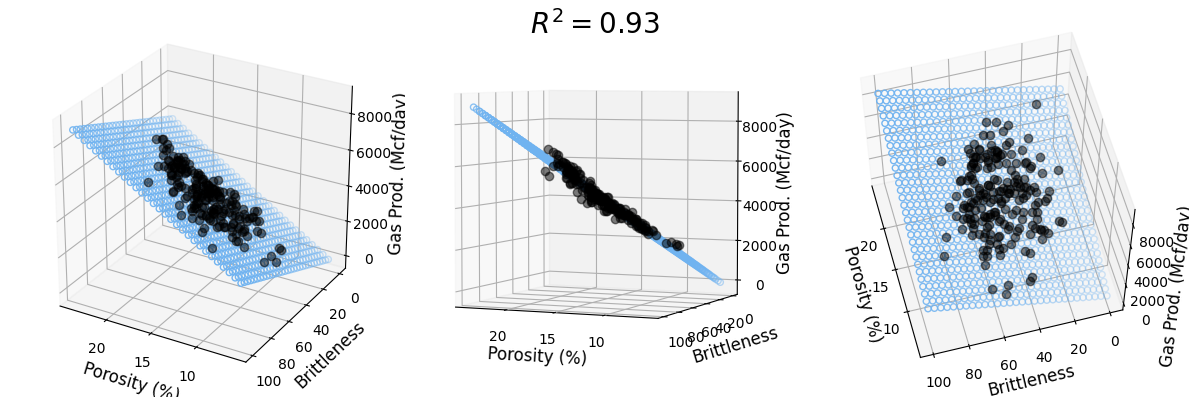

In [23]:
############################################## Plot ################################################

plt.style.use('default')

fig = plt.figure(figsize=(12, 4))

ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
ax3 = fig.add_subplot(133, projection='3d')

axes = [ax1, ax2, ax3]

for ax in axes:
    ax.plot(x, y, z, color='k', zorder=15, linestyle='none', marker='o', alpha=0.5)
    ax.scatter(xx_pred.flatten(), yy_pred.flatten(), predicted, facecolor=(0,0,0,0), s=20, edgecolor='#70b3f0')
    ax.set_xlabel('Porosity (%)', fontsize=12)
    ax.set_ylabel('Brittleness', fontsize=12)
    ax.set_zlabel('Gas Prod. (Mcf/day)', fontsize=12)
    ax.locator_params(nbins=4, axis='x')
    ax.locator_params(nbins=5, axis='x')


ax1.view_init(elev=28, azim=120)
ax2.view_init(elev=4, azim=114)
ax3.view_init(elev=60, azim=165)

fig.suptitle('$R^2 = %.2f$' % r2, fontsize=20)

fig.tight_layout()

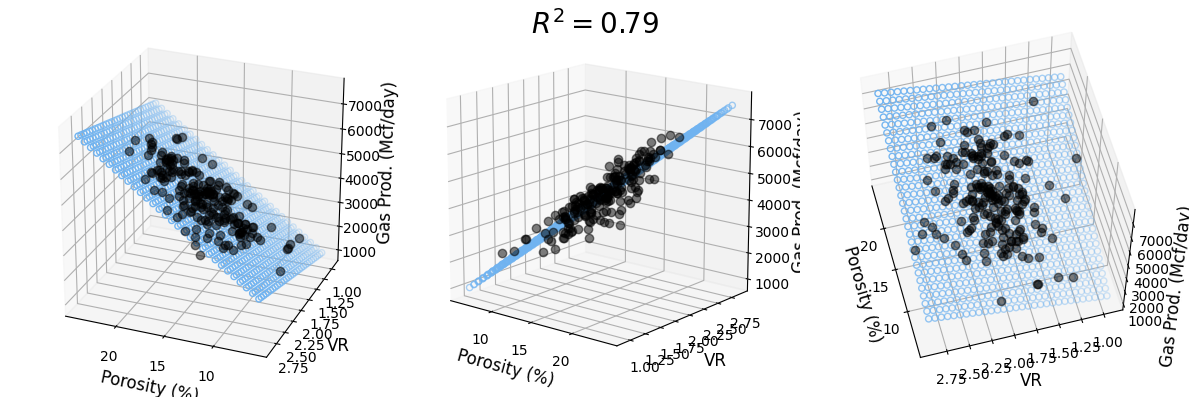

In [24]:
######################################## Data preparation #########################################


X = df[['Por', 'VR']].values.reshape(-1,2)
Y = df['Prod']

######################## Prepare model data point for visualization ###############################

x = X[:, 0]
y = X[:, 1]
z = Y

x_pred = np.linspace(6, 24, 30)      # range of porosity values
y_pred = np.linspace(0.93, 2.9, 30)  # range of VR values
xx_pred, yy_pred = np.meshgrid(x_pred, y_pred)
model_viz = np.array([xx_pred.flatten(), yy_pred.flatten()]).T

################################################ Train #############################################

ols = linear_model.LinearRegression()
model = ols.fit(X, Y)
predicted = model.predict(model_viz)

############################################## Evaluate ############################################

r2 = model.score(X, Y)

############################################## Plot ################################################

plt.style.use('default')

fig = plt.figure(figsize=(12, 4))

ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
ax3 = fig.add_subplot(133, projection='3d')

axes = [ax1, ax2, ax3]

for ax in axes:
    ax.plot(x, y, z, color='k', zorder=15, linestyle='none', marker='o', alpha=0.5)
    ax.scatter(xx_pred.flatten(), yy_pred.flatten(), predicted, facecolor=(0,0,0,0), s=20, edgecolor='#70b3f0')
    ax.set_xlabel('Porosity (%)', fontsize=12)
    ax.set_ylabel('VR', fontsize=12)
    ax.set_zlabel('Gas Prod. (Mcf/day)', fontsize=12)
    ax.locator_params(nbins=4, axis='x')
    ax.locator_params(nbins=5, axis='x')


ax1.view_init(elev=27, azim=112)
ax2.view_init(elev=16, azim=-51)
ax3.view_init(elev=60, azim=165)

fig.suptitle('$R^2 = %.2f$' % r2, fontsize=20)

fig.tight_layout()

In [25]:
!pip install scikit-learn==0.22

     |████████████████████████████████| 7.0 MB 5.1 MB/s 
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
# MAE, MAPE를 구하기 위한 scikit-learn 함수
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

ImportError: ignored

In [29]:
file = 'https://aegis4048.github.io/downloads/notebooks/sample_data/unconv_MV_v5.csv'
df = pd.read_csv(file)

# 'Por' 을 포함하는 독립변수
X1 = df['Por'].values.reshape(-1,1) 

# 'Por', 'Perm', 'AI', 'Brittle', 'TOC', 'VR' 을 포함하는 독립변수
Xn = df[['Por', 'Perm', 'AI', 'Brittle', 'TOC', 'VR']].values 

# 실제값, 종속변수
y = df['Prod'].values 

In [30]:
# 'Por'만을 이용하여 LinerRegression 모델 학습
ols_1 = linear_model.LinearRegression()
model_1 = ols_1.fit(X1, y)
response_1 = model_1.predict(X1)

In [31]:
# 'Por', 'Perm', 'AI', 'Brittle', 'TOC', 'VR' 6개의 데이터를 이용하여 
# Multivariable Regression 모델 학습
ols_n = linear_model.LinearRegression()
model_n = ols_n.fit(Xn, y)
response_n = model_n.predict(Xn)

In [32]:
# 위의 두가지 경우의 MAE 계산
MAE_1 = mean_absolute_error(y, response_1)
MAE_n = mean_absolute_error(y, response_n)

# 위의 두가지 경우의 MAPE 계산
MAPE_1 = metrics.mean_absolute_percentage_error(y, response_1)
MAPE_n = mean_absolute_percentage_error(y, response_n)

AttributeError: ignored

In [ ]:
# 계산한 MAE, MAPE 출력
print('MAE(MAE_1)   : ' + str(MAE_1))
print('MAE(MAE_n)   : ' + str(MAE_n))
print('MAPE(MAPE_1) : ' + str(MAPE_1))
print('MAPE(MAPE_n) : ' + str(MAPE_n))

MAE(MAE_1)   : 400.937842183999
MAE(MAE_n)   : 153.60366973557007
MAPE(MAPE_1) : 0.09999832588687849
MAPE(MAPE_n) : 0.03629480412348001


In [ ]:
len(y)

200

In [ ]:
len(X)

200